## Question 4: How many employees are in each industry?
## Question 5: What is the average annual salary based on industry?

**Note: Little transformation was done as the extracted data was already very clean and easy to manipulate for the visualizations**

All the necessary libraries to execute all the code:

In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Extract

Data was extracted from the [Annual Business Survey (ABS) APIs](https://www.census.gov/data/developers/data-sets/abs.html).

In [32]:
url = 'https://api.census.gov/data/2018/abscs?get=NAICS2017,NAICS2017_LABEL,PAYANN,EMP&for=us:*'

In [33]:
response = requests.get(url)

In [34]:
data = response.json()

columns = data[0]

# Generation of the Data Frame
df = pd.DataFrame(data[1:], columns = columns)

### Transform

Renaming columns for later clarity when generating the visualizations.

In [35]:
df.rename(columns = {
                        'NAICS2017' : 'Industry Code',
                        'NAICS2017_LABEL' : 'Industry Name',
                        'PAYANN' : 'Annual Payroll ($1000)',
                        'EMP' : 'Number of Employees'
                     },
                        inplace = True)

Dropping a column that is not needed for the visualizations.

In [36]:
df = df.drop(columns = 'us')

Converting the datatypes of two of the columns.

In [37]:
convert_dict = {
                    'Annual Payroll ($1000)' : np.int64,
                    'Number of Employees' : np.int64
                }

df = df.astype(convert_dict)

Creating a new column 'Annual Income ($1000)'.

In [38]:
df['Annual Income ($1000)'] = (df['Annual Payroll ($1000)'] / df['Number of Employees'])

Dropping unecessary rows.

In [39]:
df = df.drop([0,19])

In [40]:
df

,Industry Code,Industry Name,Annual Payroll ($1000),Number of Employees,Annual Income ($1000)
1,11,"Agriculture, forestry, fishing and hunting",11184335,599905,18.643510
2,21,"Mining, quarrying, and oil and gas extraction",60692728,638283,95.087489
3,23,Construction,424172015,6754898,62.794733
4,31-33,Manufacturing,724009247,12006094,60.303480
5,42,Wholesale trade,454494182,6109303,74.393786
6,44-45,Retail trade,462509026,15875876,29.132819
7,48-49,Transportation and warehousing,263999071,5049216,52.285161
8,51,Information,390433031,3673165,106.293355
9,52,Finance and insurance,681850345,6643953,102.627208
10,53,Real estate and rental and leasing,116333278,2111832,55.086426


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 20
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Industry Code           19 non-null     object 
 1   Industry Name           19 non-null     object 
 2   Annual Payroll ($1000)  19 non-null     int64  
 3   Number of Employees     19 non-null     int64  
 4   Annual Income ($1000)   19 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 912.0+ bytes


### Load

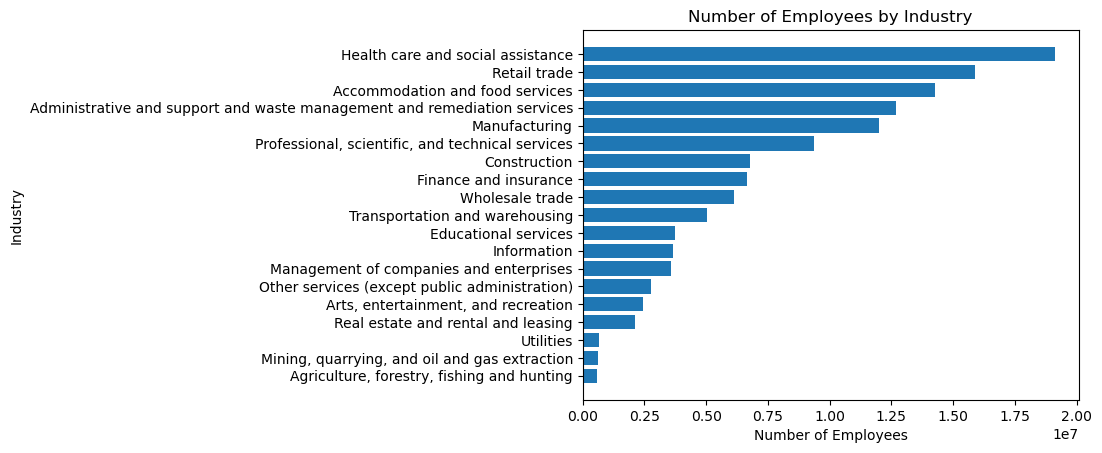

In [42]:
# Sorting the table by 'Number of Employees' to ensure the bars on the graph are in order
num_employees_by_industry = df.sort_values('Number of Employees') 

plt.barh(num_employees_by_industry['Industry Name'], num_employees_by_industry['Number of Employees'])
plt.title('Number of Employees by Industry')
plt.xlabel('Number of Employees')
plt.ylabel('Industry')
plt.show()

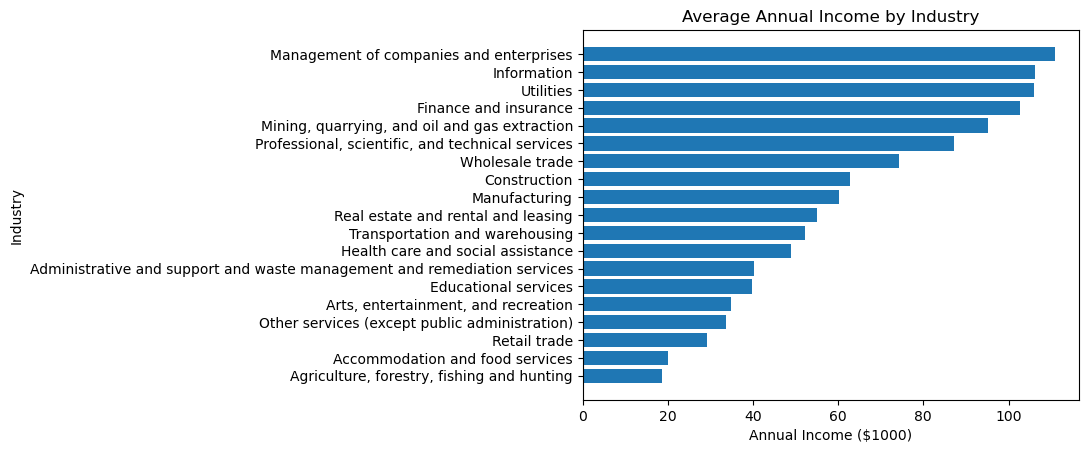

In [43]:
# Sorting the table by 'Annual Income ($1000)' to ensure the bars on the graph are in order
annual_income_by_industry = df.sort_values('Annual Income ($1000)')

plt.barh(annual_income_by_industry['Industry Name'], annual_income_by_industry['Annual Income ($1000)'])
plt.title('Average Annual Income by Industry')
plt.xlabel('Annual Income ($1000)')
plt.ylabel('Industry')
plt.show()